In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('train.csv')
Validation_data=pd.read_csv('test.csv')

In [3]:
Data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Validation_data.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features=Data.drop('label',axis=1)
label=Data['label']

In [6]:
features.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(features,label)

In [9]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(31500, 784)
(10500, 784)
(31500,)
(10500,)


In [10]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(C=20,multi_class='multinomial',solver='lbfgs', fit_intercept=False,n_jobs=-1)

In [11]:
reg.fit(X,y)

LogisticRegression(C=20, fit_intercept=False, multi_class='multinomial',
                   n_jobs=-1)

In [12]:
y_predict=reg.predict(X)
y_test_predict=reg.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print("accuracy_score on X: ",accuracy_score(y,y_predict)  )
print("accuracy_score on X_test: ",accuracy_score(y_test,y_test_predict)  )

accuracy_score on X:  0.9423492063492064
accuracy_score on X_test:  0.9134285714285715


In [14]:
def print_pixels(data,predict, n):
    # Select the first n images and labels
    first_n_images = data.iloc[:n]

    first_n_labels_predicted=predict.iloc[:n]
    
    fig, axes = plt.subplots(1, n, figsize=(n * 3, 3))
    
    for i, ax in enumerate(axes):
    
        # Extract the pixel values for the current image
        predicted=int(first_n_labels_predicted.iloc[i].values)
        pixels = first_n_images.iloc[i].values
        # Reshape the pixel values to a 28x28 array
        image = pixels.reshape(28, 28)
        # Display the image
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Predicted Digit : {predicted}')
        ax.axis('off')
    
    plt.show()


In [15]:
y_test_predict=pd.DataFrame({'predicted': y_test_predict} )
y_predict=pd.DataFrame({'predicted':y_predict})

C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_19960\1688591405.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted=int(first_n_labels_predicted.iloc[i].values)


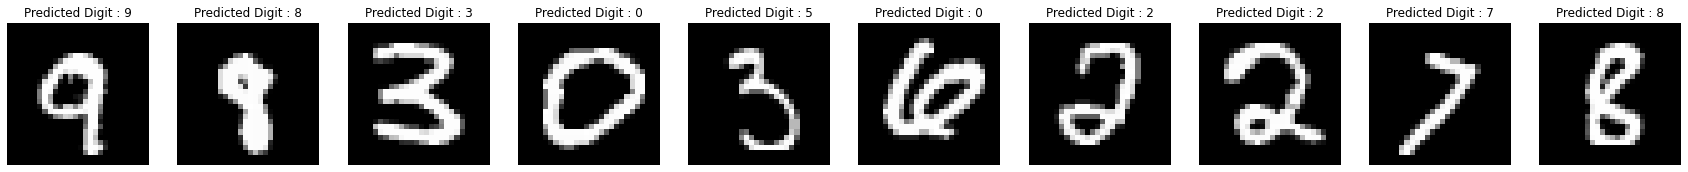

In [16]:
print_pixels(X,y_predict,10)


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_19960\1688591405.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted=int(first_n_labels_predicted.iloc[i].values)


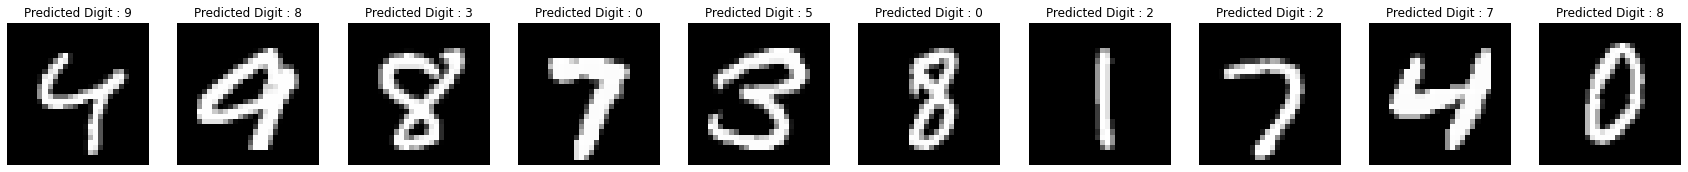

In [17]:
print_pixels(X_test,y_predict,10)

In [18]:
predict_validation=reg.predict(Validation_data)

In [19]:
predict_validation=pd.DataFrame({'predicted': predict_validation} )

C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_19960\1688591405.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted=int(first_n_labels_predicted.iloc[i].values)


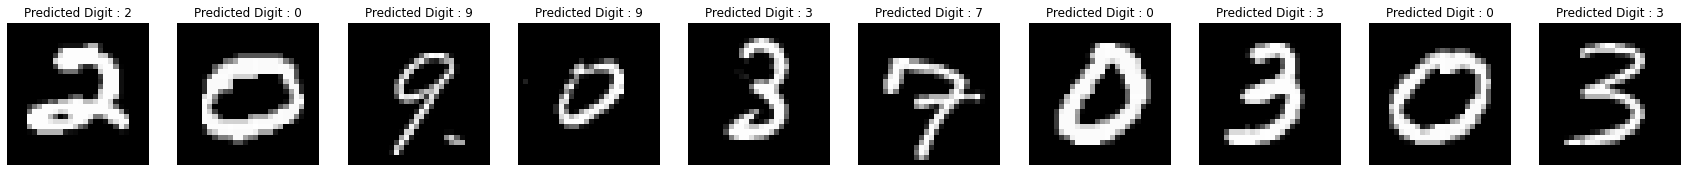

In [20]:
print_pixels(Validation_data,predict_validation,10)

In [21]:
sample=pd.read_csv("sample_submission.csv")

In [22]:
sample.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [23]:
sample['Label']=predict_validation
sample.to_csv('sample_submission.csv',index=False)

### The Submission file have  91% accuracy in the kaggle competition

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid={ 
    'solver': ['newton-cg','saga', 'lbfgs', 'sag'] 
}


In [33]:
model=LogisticRegression(C=20,n_jobs=-1)

In [34]:
grid_search=GridSearchCV(model,param_grid=param_grid,refit=True,verbose=2,cv=3,n_jobs=-1)

In [35]:
grid_search.fit(X,y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(C=20, n_jobs=-1), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'saga', 'lbfgs', 'sag']},
             verbose=2)

In [59]:
print(grid_search.best_params_)
best_reg=grid_search.best_estimator_

{'solver': 'saga'}


In [52]:
y_predict_tuned=best_reg.predict(X)
y_test_predict_tuned=best_reg.predict(X_test)
print(f'accuracy_score for X after  tuning the model :{accuracy_score(y,y_predict_tuned)}')
print(f'accuracy_score for X_test after  tuning the model :{accuracy_score(y_test,y_test_predict_tuned)}')

accuracy_score for X after  tuning the model :0.9484761904761905
accuracy_score for X_test after  tuning the model :0.9138095238095238


In [68]:
new_param_grid={ 
    'C': [0.01,0.1,10,20]
}
new_model=LogisticRegression(solver='saga',n_jobs=-1)

new_grid_search=GridSearchCV(new_model,param_grid=new_param_grid,refit=True,verbose=2,cv=3,n_jobs=-1)

In [69]:
new_grid_search.fit(X,y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 10, 20]}, verbose=2)

In [70]:
print(new_grid_search.best_params_)
new_best_reg=new_grid_search.best_estimator_

{'C': 0.1}


In [71]:
y_predict_C_tuned=new_best_reg.predict(X)
y_test_predict_C_tuned=new_best_reg.predict(X_test)
print(f'accuracy_score for X after  tuning C parameter  :{accuracy_score(y,y_predict_C_tuned)}')
print(f'accuracy_score for X_test after  tuning C parameter  :{accuracy_score(y_test,y_test_predict_C_tuned)}')

accuracy_score for X after  tuning C parameter  :0.9486349206349206
accuracy_score for X_test after  tuning C parameter  :0.9138095238095238


In [72]:
final_predict_validation=new_best_reg.predict(Validation_data)
sample['Label']=final_predict_validation
sample.to_csv('sample_submission.csv',index=False)